In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
df = pd.read_csv("data/bank_data.csv")
df.head()


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [14]:
print("Dataset Shape:", df.shape)
print("\nColumns:", df.columns.tolist())
print("\nMissing Values:\n", df.isnull().sum())
print("\nData Types:\n", df.dtypes)
print("\nFirst 5 rows:\n", df.head())

Dataset Shape: (999, 11)

Columns: ['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig', 'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud', 'isFlaggedFraud']

Missing Values:
 step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

Data Types:
 step                int64
type               object
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
isFlaggedFraud      int64
dtype: object

First 5 rows:
    step      type    amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0     1   PAYMENT   9839.64  C1231006815       170136.0       160296.36   
1     1   PAYMENT   1864.28  C1666544295        21249.0        19384.72   
2     1 

In [20]:
print("\nSummary Statistics:\n", df.describe())


Summary Statistics:
         step        amount  oldbalanceOrg  newbalanceOrig  oldbalanceDest  \
count  999.0  9.990000e+02   9.990000e+02    9.990000e+02    9.990000e+02   
mean     1.0  1.183156e+05   8.654692e+05    8.858847e+05    6.664430e+05   
std      0.0  2.485772e+05   2.078901e+06    2.128672e+06    2.062153e+06   
min      1.0  8.730000e+00   0.000000e+00    0.000000e+00    0.000000e+00   
25%      1.0  4.495580e+03   0.000000e+00    0.000000e+00    0.000000e+00   
50%      1.0  1.489551e+04   1.452800e+04    5.745780e+03    2.903100e+04   
75%      1.0  1.428632e+05   1.084305e+05    1.021757e+05    4.372994e+05   
max      1.0  2.545478e+06   9.716462e+06    9.987287e+06    1.770000e+07   

       newbalanceDest     isFraud  isFlaggedFraud  
count    9.990000e+02  999.000000           999.0  
mean     1.226846e+06    0.009009             0.0  
std      3.442804e+06    0.094535             0.0  
min      0.000000e+00    0.000000             0.0  
25%      0.000000e+00   

C:\Users\Rajeev kumar\AppData\Local\Temp\ipykernel_6632\104803342.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=fraud_counts.index, y=fraud_counts.values, palette="viridis")


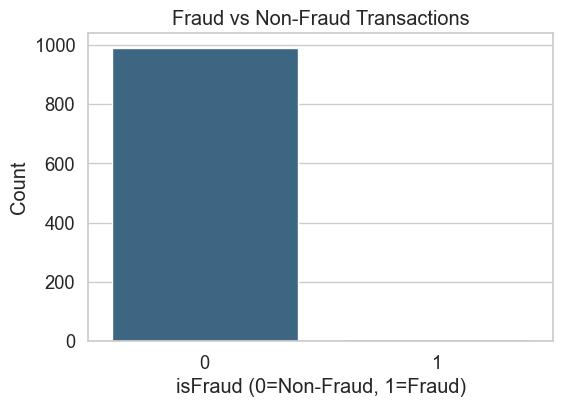

In [21]:
# Distribution of target variable
fraud_counts = df['isFraud'].value_counts()
plt.figure(figsize=(6,4))
sns.barplot(x=fraud_counts.index, y=fraud_counts.values, palette="viridis")
plt.title("Fraud vs Non-Fraud Transactions")
plt.xlabel("isFraud (0=Non-Fraud, 1=Fraud)")
plt.ylabel("Count")
plt.show()

C:\Users\Rajeev kumar\AppData\Local\Temp\ipykernel_6632\3878387075.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="type", order=df["type"].value_counts().index, palette="Set2")


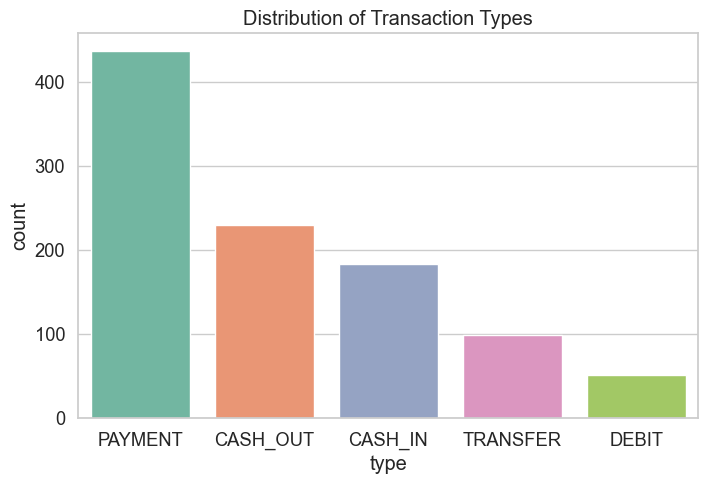

In [22]:
# 5. Transaction Types

plt.figure(figsize=(8,5))
sns.countplot(data=df, x="type", order=df["type"].value_counts().index, palette="Set2")
plt.title("Distribution of Transaction Types")
plt.show()

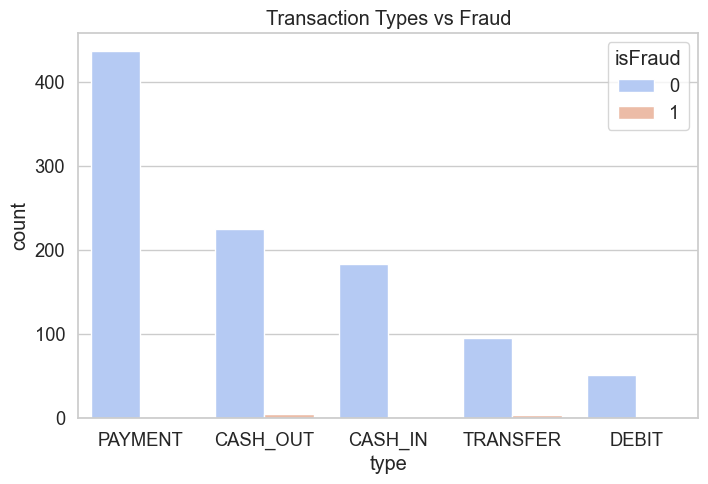

In [23]:
plt.figure(figsize=(8,5))
sns.countplot(data=df, x="type", hue="isFraud", order=df["type"].value_counts().index, palette="coolwarm")
plt.title("Transaction Types vs Fraud")
plt.show()

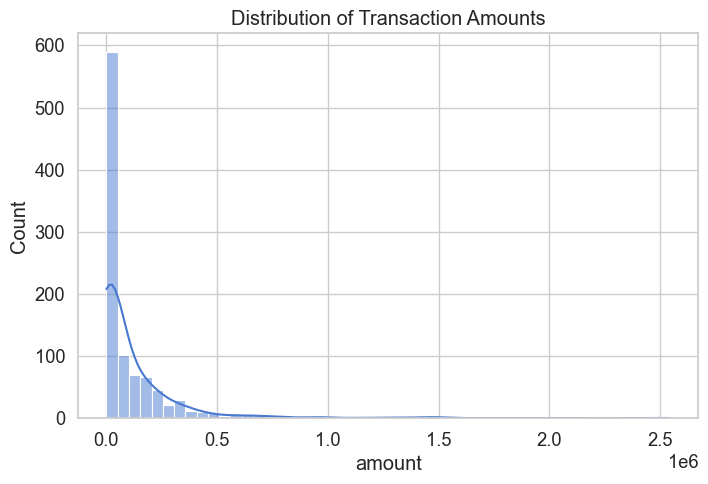

In [24]:
# 6. Amount Analysis
plt.figure(figsize=(8,5))
sns.histplot(df['amount'], bins=50, kde=True)
plt.title("Distribution of Transaction Amounts")
plt.show()

C:\Users\Rajeev kumar\AppData\Local\Temp\ipykernel_6632\213566314.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="isFraud", y="amount", data=df, palette="coolwarm")


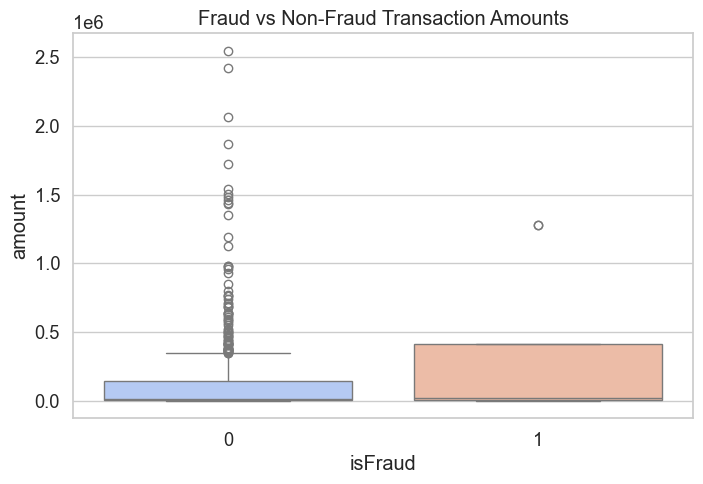

In [25]:
plt.figure(figsize=(8,5))
sns.boxplot(x="isFraud", y="amount", data=df, palette="coolwarm")
plt.title("Fraud vs Non-Fraud Transaction Amounts")
plt.show()

In [26]:
# 7. Account Balance Analysis
balance_cols = ['oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest']

<Figure size 1000x600 with 0 Axes>

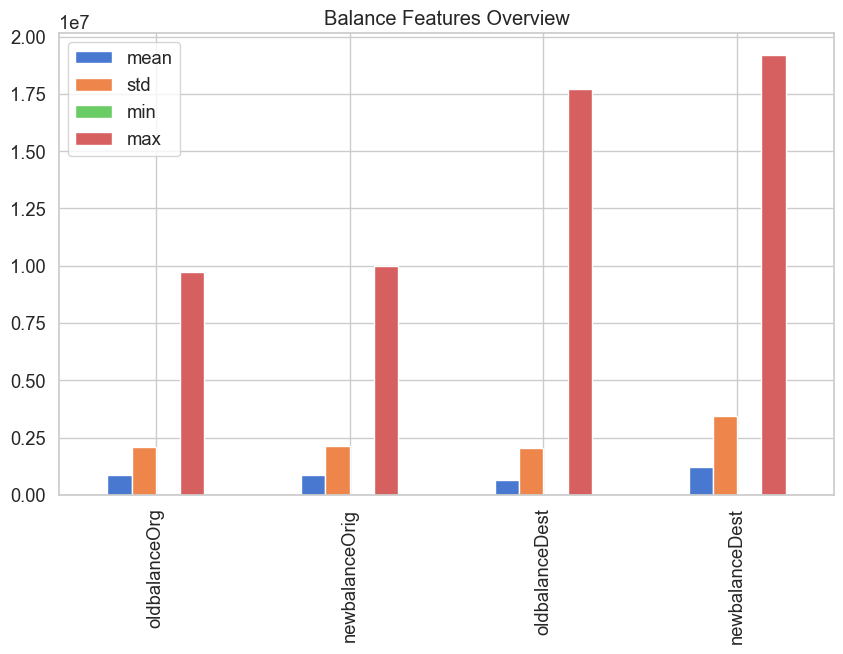

In [27]:
plt.figure(figsize=(10,6))
df[balance_cols].describe().T[['mean','std','min','max']].plot(kind='bar', figsize=(10,6))
plt.title("Balance Features Overview")
plt.show()

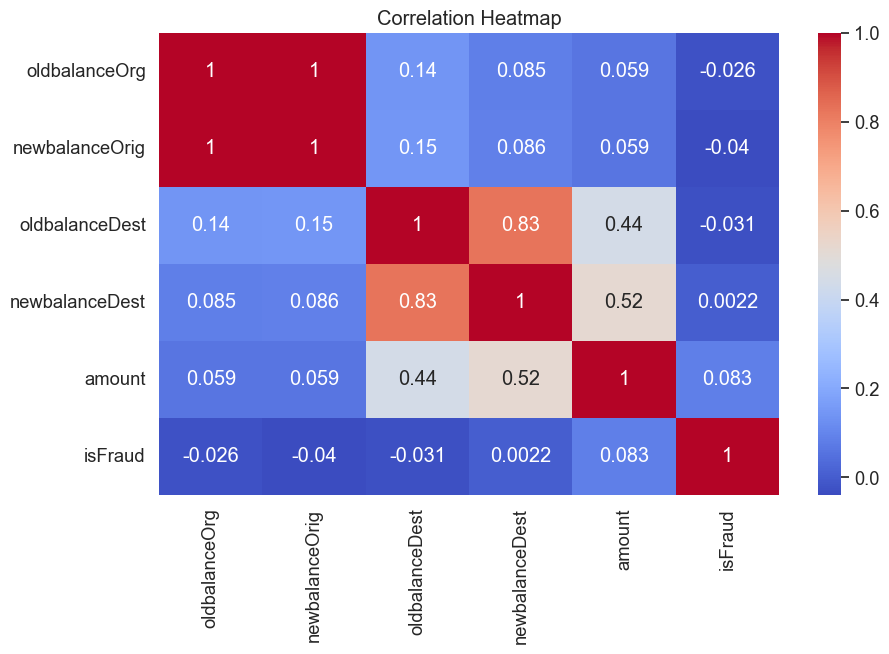

In [28]:
# Correlation heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df[balance_cols+['amount','isFraud']].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

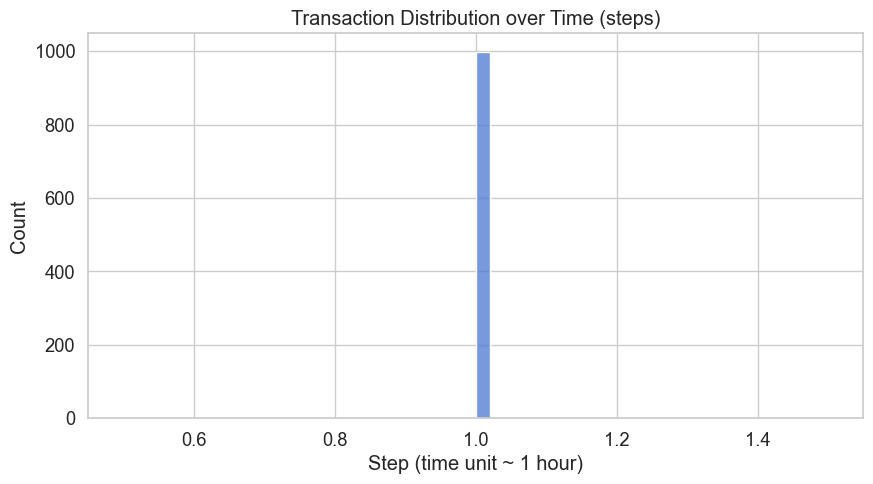

In [29]:
# 8. Time Feature (Step)
plt.figure(figsize=(10,5))
sns.histplot(df["step"], bins=50, kde=False)
plt.title("Transaction Distribution over Time (steps)")
plt.xlabel("Step (time unit ~ 1 hour)")
plt.ylabel("Count")
plt.show()

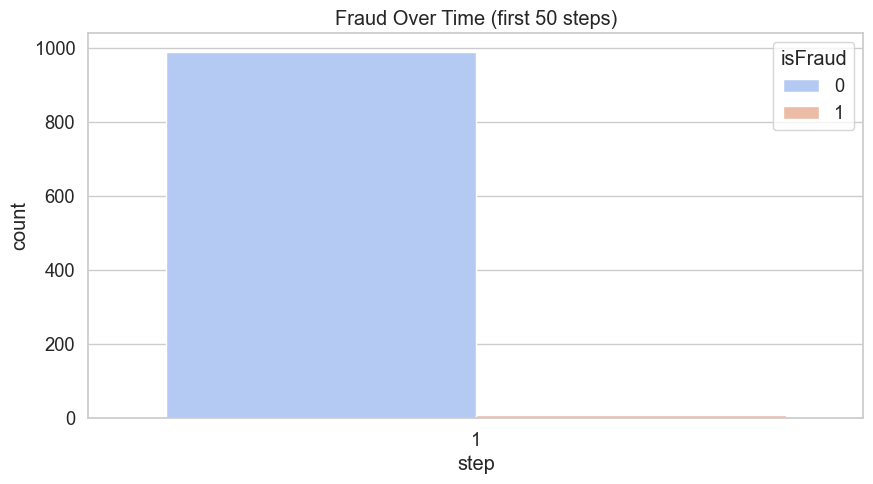

In [30]:
plt.figure(figsize=(10,5))
sns.countplot(x="step", hue="isFraud", data=df, palette="coolwarm", order=sorted(df["step"].unique())[:50])
plt.title("Fraud Over Time (first 50 steps)")
plt.show()

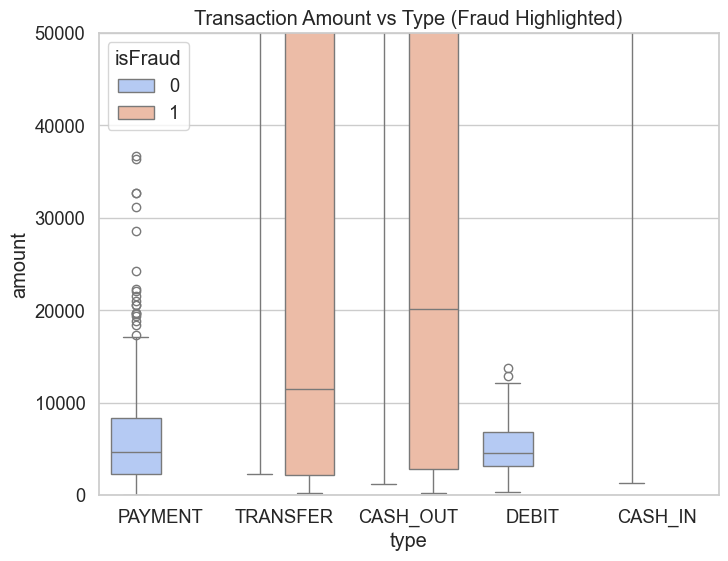

In [31]:
plt.figure(figsize=(8,6))
sns.boxplot(x="type", y="amount", hue="isFraud", data=df, palette="coolwarm")
plt.ylim(0, 50000)  # zoom in for better visibility
plt.title("Transaction Amount vs Type (Fraud Highlighted)")
plt.show()

C:\Users\Rajeev kumar\AppData\Local\Temp\ipykernel_6632\1581872886.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=fraud_ratio.index, y=fraud_ratio.values, palette="Reds")


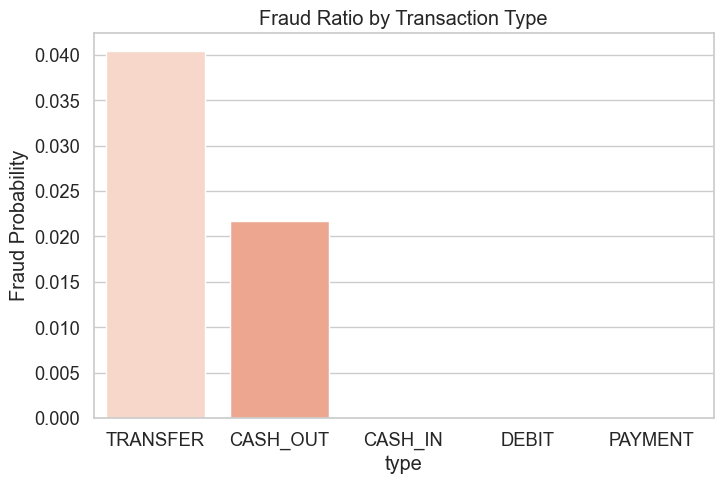

In [32]:
# 10. Fraud Ratio per Transaction Type
fraud_ratio = df.groupby("type")["isFraud"].mean().sort_values(ascending=False)
plt.figure(figsize=(8,5))
sns.barplot(x=fraud_ratio.index, y=fraud_ratio.values, palette="Reds")
plt.title("Fraud Ratio by Transaction Type")
plt.ylabel("Fraud Probability")
plt.show()

C:\Users\Rajeev kumar\AppData\Local\Temp\ipykernel_6632\2286272184.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="isFlaggedFraud", data=df, palette="Set1")


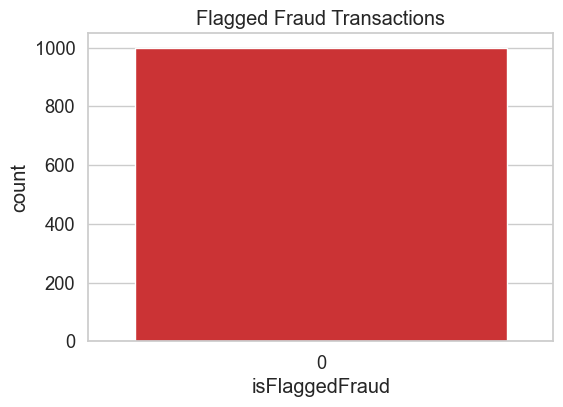


Flagged Fraud Distribution:
 isFlaggedFraud
0    999
Name: count, dtype: int64


In [34]:
# 11. Flagged Transactions
plt.figure(figsize=(6,4))
sns.countplot(x="isFlaggedFraud", data=df, palette="Set1")
plt.title("Flagged Fraud Transactions")
plt.show()


print("\nFlagged Fraud Distribution:\n", df["isFlaggedFraud"].value_counts())

In [35]:
print("✅ Key Insights:")
print("- Dataset is highly imbalanced (very few fraud cases).")
print("- Fraud mostly occurs in TRANSFER and CASH_OUT transactions.")
print("- Fraudulent transactions usually involve higher amounts.")
print("- Old and new balances often behave abnormally in fraud cases.")
print("- 'isFlaggedFraud' rarely flags fraud compared to actual 'isFraud'.")

✅ Key Insights:
- Dataset is highly imbalanced (very few fraud cases).
- Fraud mostly occurs in TRANSFER and CASH_OUT transactions.
- Fraudulent transactions usually involve higher amounts.
- Old and new balances often behave abnormally in fraud cases.
- 'isFlaggedFraud' rarely flags fraud compared to actual 'isFraud'.


### Model training:

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import IsolationForest
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

In [37]:
data = df.copy()

In [38]:
# Encode 'type' categorical feature
le = LabelEncoder()
data['type'] = le.fit_transform(data['type'])

In [39]:
# Drop non-numeric identifiers (nameOrig, nameDest not useful for prediction)
data = data.drop(columns=['nameOrig','nameDest'])

In [40]:
# Features & Target
X = data.drop(columns=['isFraud','isFlaggedFraud'])
y = data['isFraud']

In [41]:

# Scale numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [42]:
# 14. Train-Test Split

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y)

In [43]:

print("Train shape:", X_train.shape, "Test shape:", X_test.shape)

Train shape: (799, 7) Test shape: (200, 7)


In [44]:
# 15. Logistic Regression
log_reg = LogisticRegression(class_weight="balanced", max_iter=500)
log_reg.fit(X_train, y_train)

y_pred_lr = log_reg.predict(X_test)
y_prob_lr = log_reg.predict_proba(X_test)[:,1]

print("\n=== Logistic Regression Report ===")
print(classification_report(y_test, y_pred_lr))
print("ROC-AUC:", roc_auc_score(y_test, y_prob_lr))



=== Logistic Regression Report ===
              precision    recall  f1-score   support

           0       0.99      0.94      0.97       198
           1       0.08      0.50      0.14         2

    accuracy                           0.94       200
   macro avg       0.54      0.72      0.56       200
weighted avg       0.99      0.94      0.96       200

ROC-AUC: 0.7525252525252526


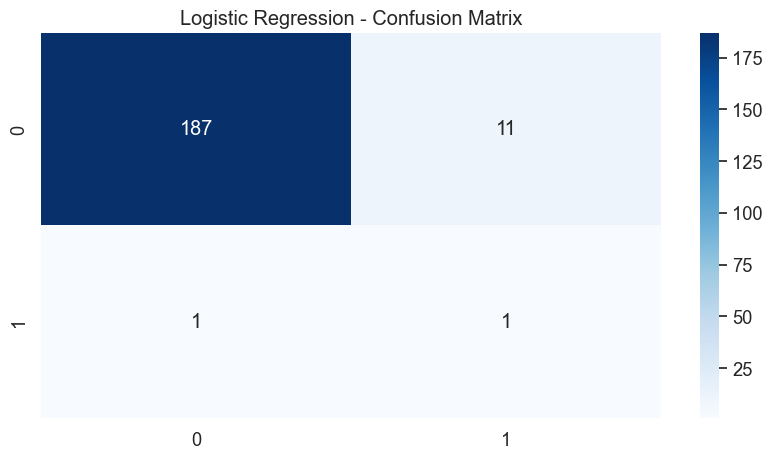

In [45]:
sns.heatmap(confusion_matrix(y_test, y_pred_lr), annot=True, fmt='d', cmap="Blues")
plt.title("Logistic Regression - Confusion Matrix")
plt.show()


In [47]:
iso_forest = IsolationForest(
    n_estimators=200,
    contamination=0.01,  # assume ~1% fraud
    random_state=42
)

iso_forest.fit(X_train)

IsolationForest(contamination=0.01, n_estimators=200, random_state=42)

In [48]:
y_pred_if = iso_forest.predict(X_test)
y_pred_if = np.where(y_pred_if == -1, 1, 0)

In [49]:

print("\n=== Isolation Forest Report ===")
print(classification_report(y_test, y_pred_if))
print("ROC-AUC:", roc_auc_score(y_test, y_pred_if))


=== Isolation Forest Report ===
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       198
           1       0.00      0.00      0.00         2

    accuracy                           0.96       200
   macro avg       0.49      0.49      0.49       200
weighted avg       0.98      0.96      0.97       200

ROC-AUC: 0.48737373737373735


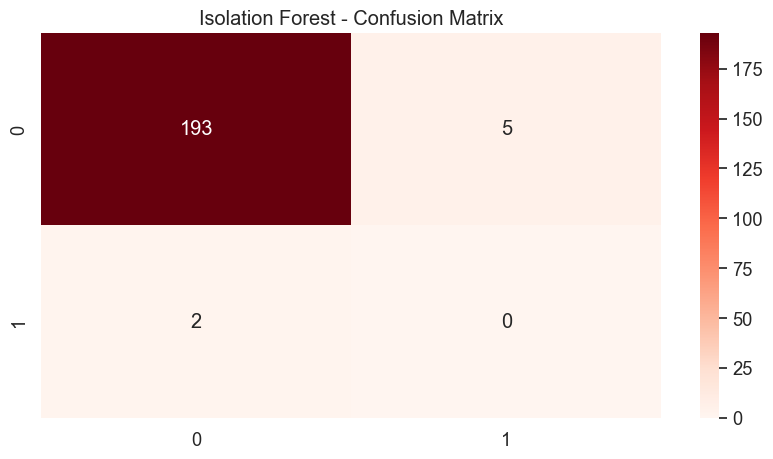

In [50]:
sns.heatmap(confusion_matrix(y_test, y_pred_if), annot=True, fmt='d', cmap="Reds")
plt.title("Isolation Forest - Confusion Matrix")
plt.show()

In [51]:
print("✅ Logistic Regression: ROC-AUC = {:.4f}".format(roc_auc_score(y_test, y_prob_lr)))
print("✅ Isolation Forest: ROC-AUC = {:.4f}".format(roc_auc_score(y_test, y_pred_if)))

✅ Logistic Regression: ROC-AUC = 0.7525
✅ Isolation Forest: ROC-AUC = 0.4874


In [52]:
import pickle
import joblib

# Save Logistic Regression model
with open("log_reg_model.pkl", "wb") as f:
    pickle.dump(log_reg, f)

# Save Isolation Forest model
with open("iso_forest_model.pkl", "wb") as f:
    pickle.dump(iso_forest, f)

# Save scaler (important for preprocessing new data)
with open("scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)

# Save label encoder for 'type'
with open("label_encoder.pkl", "wb") as f:
    pickle.dump(le, f)

print("✅ Models and preprocessing objects saved successfully!")


✅ Models and preprocessing objects saved successfully!
